# 1. Import Required Libraries

In [1]:
import numpy as np 
import pandas as pd 

# Import graphical plotting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2. Load and Inspect Data

In [61]:
# Load the dataset
data = pd.read_csv(r"D:\FSDS Material\Dataset\L-R-R.csv")

# Display the first few rows of the dataset to get a quick overview
data.head()

# Print the column names of the dataset
print(data.columns)

# Check the data types and general info about the dataset
data.info()


Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [74]:
data

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,True,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,1,False,False,True
395,32.0,4,135.0,84.0,2295,11.6,82,1,True,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,1,True,False,False


In [63]:
# Check for missing values in each column
data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

# Purpose: Load the dataset into a DataFrame and inspect the first few rows, column names, missing values, and data types. This helps in understanding the structure of the data before proceeding with analysis.

# 3. Data Preprocessing

In [68]:
# Check and drop the 'car_name' column if it exists, as it is non-numeric
if 'car_name' in data.columns:
    data = data.drop(['car_name'], axis=1)

# Replace 'origin' values with their respective region names
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

# Perform one-hot encoding on 'origin' to convert categorical data into numeric format
data = pd.get_dummies(data, columns=['origin'])

# Replace '?' with NaN (missing values)
data = data.replace('?', np.nan)

# Convert columns with numeric values to the appropriate types
data = data.apply(pd.to_numeric, errors='ignore')

# Fill missing values with the median of each column (only for numeric columns)
data = data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x, axis=0)


# Purpose: This part handles missing data, encodes categorical variables, and replaces non-numeric values. It also ensures that all numeric columns have appropriate types and fills missing values with the median for consistency.


In [72]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


# 4. Feature Scaling and Splitting Data

In [77]:
# Separate independent variables (X) and the dependent variable (y)
x = data.drop(['mpg'], axis=1)  # Independent variables
y = data[['mpg']]  # Dependent variable

# Scale the independent variables (standardization)
x_s = preprocessing.scale(x)
x_s = pd.DataFrame(x_s, columns=x.columns)  # Convert scaled data into DataFrame

# Scale the dependent variable
y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns=y.columns)


# Purpose: This section standardizes both the independent variables (features) and the dependent variable (target), ensuring that all values are scaled to have a mean of 0 and a variance of 1 for better model performance.

# 5. Train-Test Split

In [88]:
# Split the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=1)
x_train.shape

(278, 10)

# Purpose: Split the data into training and testing sets, with 30% of the data reserved for testing to evaluate the model's performance.

# 6. Linear Regression Model

In [92]:
# Fit a simple linear regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Print the coefficients for each feature
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

# Print the intercept of the model
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))


The coefficient for cyl is 0.3210223856916108
The coefficient for disp is 0.3248343091848394
The coefficient for hp is -0.2291695005943759
The coefficient for wt is -0.7112101905072299
The coefficient for acc is 0.014713682764191435
The coefficient for yr is 0.3755811949510741
The coefficient for car_type is 0.38147694842331
The coefficient for origin_america is -0.0747224754758417
The coefficient for origin_asia is 0.04451525203567813
The coefficient for origin_europe is 0.04834854953945371
The intercept is 0.019284116103639715


# Purpose: Fit a Linear Regression model to the training data and print the coefficients of each feature along with the intercept. The coefficients indicate the impact of each feature on the target variable.

# 7. Ridge Regression Model

In [97]:
# Fit a Ridge regression model (with L2 regularization)
ridge_model = Ridge(alpha=0.3)  # Regularization strength
ridge_model.fit(x_train, y_train)

# Print Ridge model coefficients
print('Ridge model coef: {}'.format(ridge_model.coef_))
 

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


# Purpose: Fit a Ridge Regression model, which adds L2 regularization to the Linear Regression model. This helps reduce overfitting by shrinking coefficients.

# 8. Lasso Regression Model

In [100]:
# Fit a Lasso regression model (with L1 regularization)
lasso_model = Lasso(alpha=0.1)  # Regularization strength
lasso_model.fit(x_train, y_train)

# Print Lasso model coefficients
print('Lasso model coef: {}'.format(lasso_model.coef_))


Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


# Purpose: Fit a Lasso Regression model, which applies L1 regularization to perform feature selection by shrinking less important coefficients to zero

# 9. Model Evaluation (R² Score)

In [105]:
# Evaluate model performance using R-squared
print('Linear Regression R²: {}'.format(regression_model.score(x_train, y_train)))
print('Linear Regression Test R²: {}'.format(regression_model.score(x_test, y_test)))

print('*************************')
print('Ridge Regression R²: {}'.format(ridge_model.score(x_train, y_train)))
print('Ridge Regression Test R²: {}'.format(ridge_model.score(x_test, y_test)))

print('*************************')
print('Lasso Regression R²: {}'.format(lasso_model.score(x_train, y_train)))
print('Lasso Regression Test R²: {}'.format(lasso_model.score(x_test, y_test)))


Linear Regression R²: 0.8343770256960538
Linear Regression Test R²: 0.8513421387780067
*************************
Ridge Regression R²: 0.8343617931312617
Ridge Regression Test R²: 0.8518882171608501
*************************
Lasso Regression R²: 0.7938010766228453
Lasso Regression Test R²: 0.8375229615977084


# Purpose: Evaluate the performance of each model (Linear, Ridge, and Lasso) using the R² score, which indicates how well the model explains the variance in the target variable.

# 10. OLS Regression

In [110]:
# Fit an OLS model to analyze the relationship between features and target
import statsmodels.formula.api as smf
ols1 = smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data=data_train_test).fit()

# Print the OLS model parameters and summary
ols1.params
print(ols1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           3.12e-99
Time:                        13:07:11   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

# Purpose: Use OLS (Ordinary Least Squares) regression to analyze the relationships between multiple features and the target variable. The summary provides detailed statistical analysis.

# 11. Model Error (RMSE)

In [114]:
# Calculate Root Mean Squared Error (RMSE)
mse = np.mean((regression_model.predict(x_test) - y_test) ** 2)
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))


Root Mean Squared Error: 0.3776693425408783


# Purpose: Calculate and print the RMSE to evaluate how well the model performs, specifically its prediction error.

# 12. Residual Plots

<Axes: xlabel='acc', ylabel='mpg'>

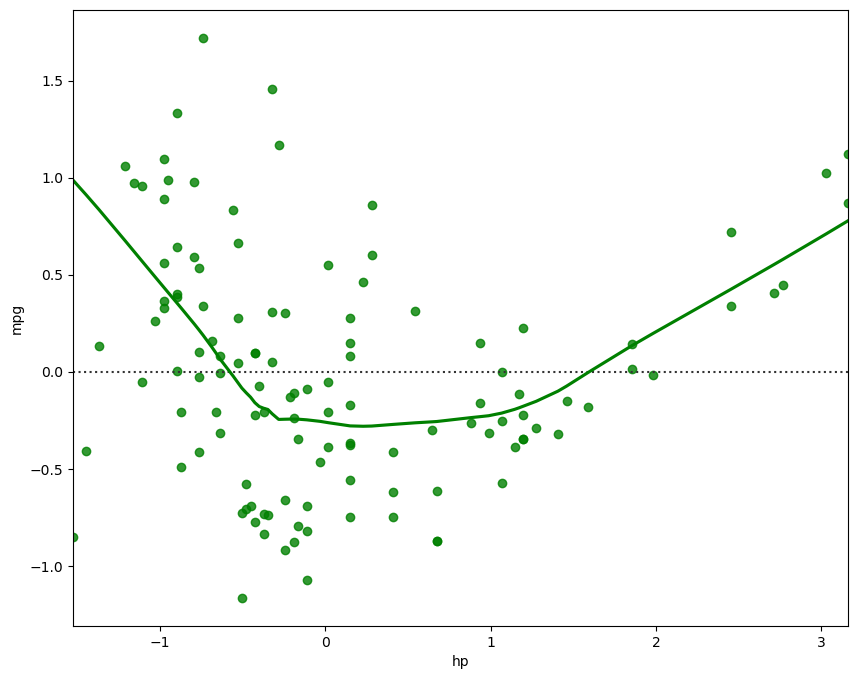

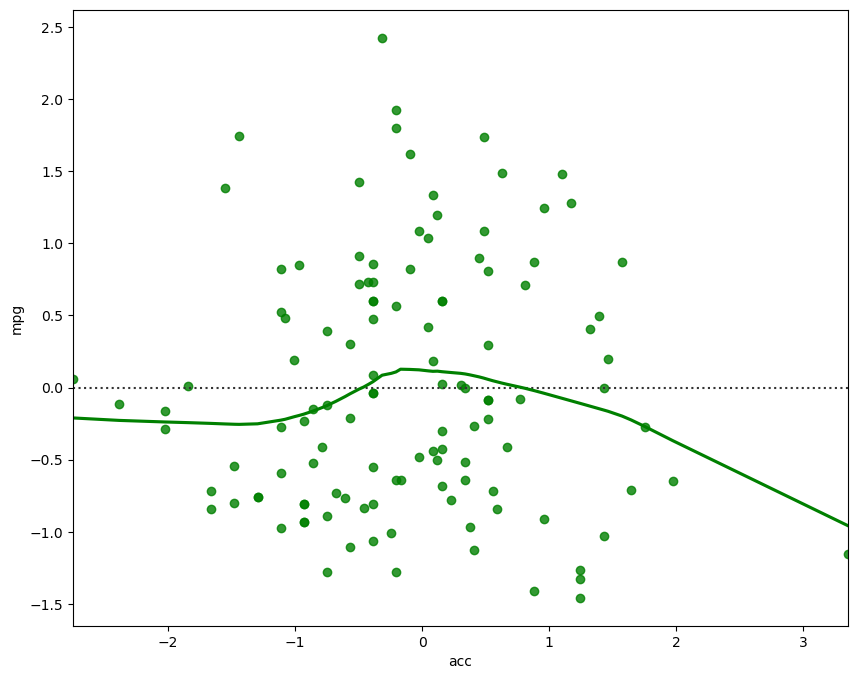

In [118]:
# Plot residuals to visualize the performance of the model
fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test['hp'], y=y_test['mpg'], color='green', lowess=True)

fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test['acc'], y=y_test['mpg'], color='green', lowess=True)

# Purpose: Use residual plots to check for patterns in the model's errors and confirm that the assumptions of linear regression hold.

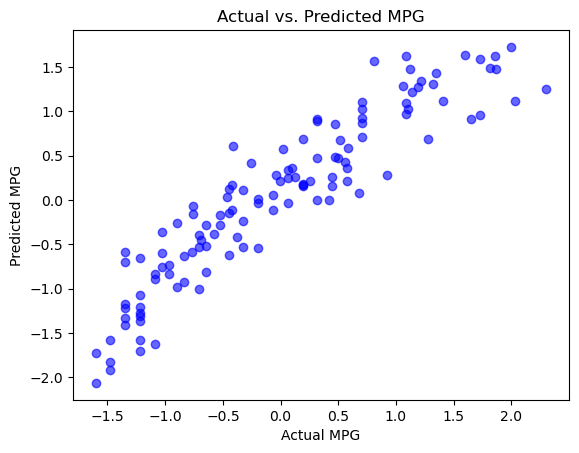

In [127]:
# Predict the target values for the test set
y_pred = regression_model.predict(x_test)

# Plot the actual vs. predicted values to assess the model's performance visually
plt.scatter(y_test['mpg'], y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.show()
